https://www.someweekendreading.blog/beta-ratios/

In [1]:
using Distributions
using HypergeometricFunctions
using QuadGK
using SpecialFunctions
using StatsFuns
using StatsPlots
default(fmt=:png)

function pdf_betaratio(κ, λ, μ, ν, x)
    if x < 0
        0.0
    elseif x ≤ 1
        exp(logbeta(κ+μ, ν) - logbeta(κ, λ) - logbeta(μ, ν) + xlogy(κ-1, x) + 
            log(max(0, _₂F₁(κ+μ, 1-λ, κ+μ+ν, x))))
    elseif x < Inf
        exp(logbeta(κ+μ, λ) - logbeta(κ, λ) - logbeta(μ, ν) + xlogy(-μ-1, x) +
        log(max(0, _₂F₁(κ+μ, 1-ν, κ+μ+λ, 1/x))))
    else
        Inf
    end
    
end

pdf_betaratio (generic function with 1 method)

(quadgk(f, 0, Inf))[1] = 1.0000000000006855


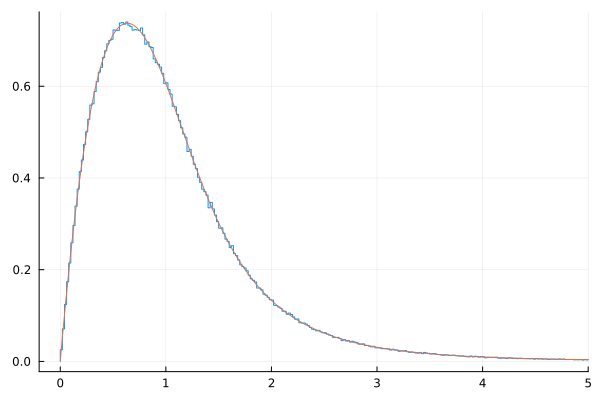

In [2]:
κ, λ, μ, ν = 2, 3, 4, 5
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
#a, b = 0.9, 1.1
plot()
stephist!(R; norm=true, label="")
plot!(f, extrema(R)...; label="")
plot!(xlim=(a, b))

(quadgk(f, 0, Inf))[1] = 0.9999999999995406


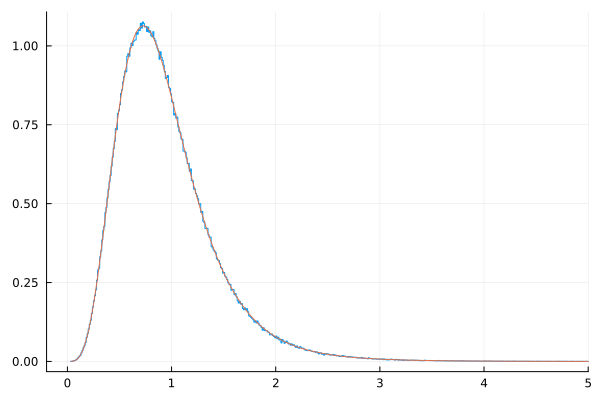

In [3]:
κ, λ, μ, ν = 5, 10, 8, 13
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
#a, b = 0.9, 1.1
plot()
stephist!(R; norm=true, label="")
plot!(f, extrema(R)...; label="")
plot!(xlim=(a, b))

(quadgk(f, 0, Inf))[1] = 1.0000000147531618


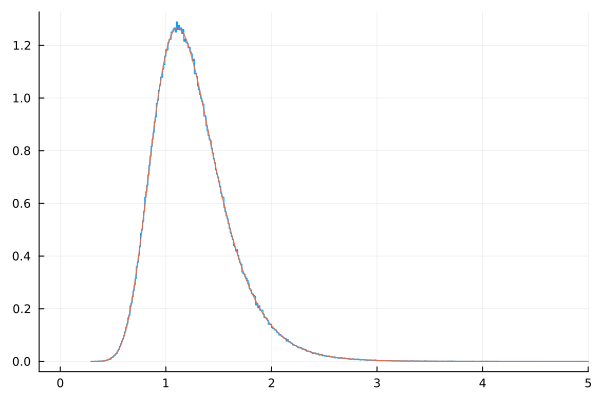

In [4]:
κ, λ, μ, ν = 20, 30, 15, 30
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
#a, b = 0.9, 1.1
plot()
stephist!(R; norm=true, label="")
plot!(f, extrema(R)...; label="")
plot!(xlim=(a, b))

(quadgk(f, 0, Inf))[1] = 0.9999994610438165


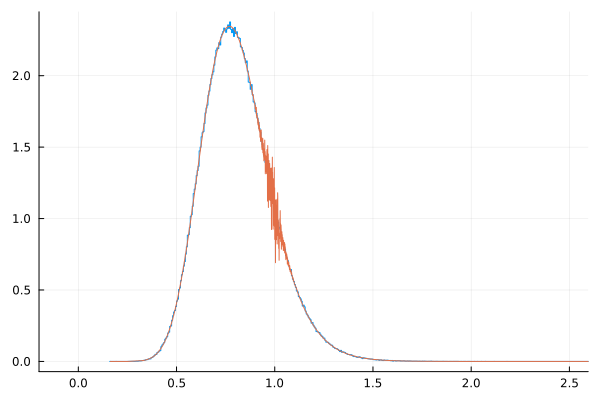

In [5]:
κ, λ, μ, ν = 20, 30, 30, 30
f = x -> pdf_betaratio(κ, λ, μ, ν, x)
@show quadgk(f, 0, Inf)[1]
L = 10^6
X = rand(Beta(κ, λ), L)
Y = rand(Beta(μ, ν), L)
R = @. X / Y
a, b = -0.2, min(5, maximum(R))
#a, b = 0.9, 1.1
plot()
stephist!(R; norm=true, label="")
plot!(f, extrema(R)...; label="")
plot!(xlim=(a, b))